# House Price Prediction & Artificial Neural Network

## ** Notebook Content **

1. Introduction


2. Loading the data
    - 2.1 Importing the required packages
    - 2.2 Loading the training data
    - 2.3 Loading the test data


3. Data Preprocessing
    - 3.1 Getting the dependent and independent variables
    - 3.2 Deleting variables with low correlation
    - 3.3 Treating categorical variables
        - 3.3.1 Convert some categorical variables into dummy
        - 3.3.2 Convert the ramaining categorical variables into numbers
    - 3.4 Applying Standard Scaler



4. Building a predictive model applying Artificial Neural Networks (ANN)
    - 4.1 Building the ANN
    - 4.2 Training the ANN model
    - 4.3 Predicting the results
    - 4.4 Check the performance of the model
    - 4.5 Create a submission for the Kaggle competition

## 1. Introduction

The goal of this notebook is to create a predictive regression model applying logististcs regression and one of the most famous areas of deep learning, the artificial neural networks.

Starting from the analysis we did in the [House Price Prediction Notebook](https://), we will try to **improve the linear regression model by applying neural networks and get a robust result**. Then, we will test the model predicting the results of the test set. After that we will save the values in a specific dataframe 
in order to formalize the delivery of the data in the Kaggle competition to which the data object of study belong. The system evaluates automatically and the data submission and tells us what score we have achieved with our results.

So, let's go for it!

## 2. Loading the data

Let's start our analysis importing the requiered python packages and loading the data set, both the train data and the test data.

__Observation:__ The imported information has already been analyzed previously in the House Price Prediction notebook, so the __null values and the outliers__ (which are related to the dependent variable) __have already been removed from the data set__ we are going to deal now.

### 2.1 Importing the requiered packages

In [1]:
# Importing the required packages
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from IPython.display import Image

Using TensorFlow backend.


In [2]:
#check the python version that we are using
print(sys.version)

3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]


In [3]:
#check the tensorflow version that we are using
tf.__version__

'2.1.0'

### 2.2 Loading the training data

In [4]:
#loading the X_training set
df_train = pd.read_csv('df_train_clean.csv')
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [5]:
df_train.shape

(1445, 74)

### 2.3 Loading the test data 

In [6]:
#loading the X_test set
X_test = pd.read_csv('df_test_clean.csv')
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [7]:
X_test.shape

(1459, 73)

## 3. Data Preprocessing

Once we have uploaded the data, we have to make a series of adjustments to achieve a robust regression model that correctly predicts the data.

We are goint to start the data processing analysis deleting those variables that present a low correlation with respect to the dependent variable (SalePrice). Then, we will turn some categorical variables into dummy and transform the rest of the text variables into numbers. 

Finally, we will normalize the data (both the train and test) to achieve all probability distributions that fit the values and avoid the effect of influences.

### 3.1 Getting the dependent and independent variables

We have to split the train data into X and y to get the details of the independent variables and the dependent variable to build our model. In addition, this action will help us in the rest of the data preprocessing analysis.

In [8]:
#Getting the Dependent and Independent variables
X_train = df_train.iloc[:, :-1] #all lines, all columns except the last one
y_train = df_train.iloc[:, 73] #all lines, only the last column

In [9]:
#check the shaape of X_train and y_train
X_train.shape, y_train.shape

((1445, 73), (1445,))

In [10]:
#check the values of the y_train
y_train.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

### 3.2 Deleting variables with low correlation

Now, we process to delete those variables with low correlation with respect to the dependent variable. The selected variables are as follows:

*'MoSold', 'ScreenPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'LowQualFinSF', 'MSSubClass', 'BsmtFinSF2', 'BsmtHalfBath' and 'OverallCond'.*

Previously, we have a detailed analysis of the correlation of the numerical variables with respect to the dependent variable. You can find more information in the fourth section (Correlation Analysis) of the [House Price Prediction Notebook], among them, the criteria followed to select those variables with low correlation to be eliminated.

We are going to star the adjustments in the training data.

In [11]:
#remove variables with low correlation in the training set
X_train.drop(['MoSold', 'ScreenPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'LowQualFinSF', 'MSSubClass',
               'BsmtFinSF2', 'BsmtHalfBath', 'OverallCond'], axis = 1, inplace = True)

X_train.shape

(1445, 62)

Now, we are going to implement the same adjustments in the test data.

In [12]:
#remove variables with low correlation in the test set
X_test.drop(['MoSold', 'ScreenPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'LowQualFinSF', 'MSSubClass',
               'BsmtFinSF2', 'BsmtHalfBath', 'OverallCond'], axis = 1, inplace = True)

X_test.shape

(1459, 62)

### 3.3 Treating categorical variables

In this subsection we are going to treat the categorical variables of our dataset. First, we have to convert some variables into dummy and then transform the ramaining text variables in numbers.

In case that you want to chek more details about the criteria followed to carry out these actions, please check the fifth section (Categorical Data Analysis) of the [House Price Prediction Notebook]().

#### 3.3.1 Convert some categorical variables into dummy

Let's convert the following categorical variables into dummies:

*'LotShape', 'LandContour', 'LandSlope', 'BldgType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive'.*

We are going to star the adjustments in the training data.

In [13]:
#adjustments in the training data
X_train = pd.get_dummies (X_train, columns = ['LotShape', 'LandContour', 'LandSlope', 'BldgType', 'ExterQual', 
                                              'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir', 'KitchenQual', 
                                              'GarageFinish', 'PavedDrive'])

X_train.shape

(1445, 94)

In [14]:
#check the names of the columns after converting the variables into dummy
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond', 'Foundation',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleType', 'SaleCondition', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'BldgType_1Fam

Now, we are going to implement the same adjustments in the test data.

In [15]:
#adjustments in the test data
X_test = pd.get_dummies (X_test, columns = ['LotShape', 'LandContour', 'LandSlope', 'BldgType', 'ExterQual', 
                                              'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir', 'KitchenQual', 
                                              'GarageFinish', 'PavedDrive'])

X_test.shape

(1459, 94)

In [16]:
#check the names of the columns after converting the variables into dummy
X_test.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond', 'Foundation',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleType', 'SaleCondition', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'BldgType_1Fam

We realized that the dummy variables have been treated correctly.

#### 3.3.2 Convert the ramaining categorical variables into numbers

Then, we have to convert the remaining categorical variables into numbers and check the performance of the model.

Let's start with the X_train data.

In [17]:
#adjustments in the training data
from sklearn.preprocessing import LabelEncoder
lencoders = {}

for col in X_train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    X_train[col] = lencoders[col].fit_transform(X_train[col])

In [18]:
#check the datatype of df_train to review that all the variables are numbers
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 94 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSZoning          1445 non-null   int32  
 1   LotFrontage       1445 non-null   float64
 2   LotArea           1445 non-null   int64  
 3   Street            1445 non-null   int32  
 4   Utilities         1445 non-null   int32  
 5   LotConfig         1445 non-null   int32  
 6   Neighborhood      1445 non-null   int32  
 7   Condition1        1445 non-null   int32  
 8   Condition2        1445 non-null   int32  
 9   HouseStyle        1445 non-null   int32  
 10  OverallQual       1445 non-null   int64  
 11  YearBuilt         1445 non-null   int64  
 12  YearRemodAdd      1445 non-null   int64  
 13  RoofStyle         1445 non-null   int32  
 14  RoofMatl          1445 non-null   int32  
 15  Exterior1st       1445 non-null   int32  
 16  Exterior2nd       1445 non-null   int32  


In [19]:
X_train.head()

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,3,65.0,8450,1,0,4,5,2,2,5,...,0,0,1,0,0,1,0,0,0,1
1,3,80.0,9600,1,0,2,24,1,2,2,...,0,0,0,1,0,1,0,0,0,1
2,3,68.0,11250,1,0,4,5,2,2,5,...,0,0,1,0,0,1,0,0,0,1
3,3,60.0,9550,1,0,0,6,2,2,5,...,0,0,1,0,0,0,1,0,0,1
4,3,84.0,14260,1,0,2,15,2,2,5,...,0,0,1,0,0,1,0,0,0,1


Let's implement the same adjustments in the test data.

In [20]:
#adjustments in the test data
from sklearn.preprocessing import LabelEncoder
lencoders = {}

for col in X_test.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    X_test[col] = lencoders[col].fit_transform(X_test[col])

In [21]:
#check the datatype of X_test to review that all the variables are numbers
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 94 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSZoning          1459 non-null   int32  
 1   LotFrontage       1459 non-null   float64
 2   LotArea           1459 non-null   int64  
 3   Street            1459 non-null   int32  
 4   Utilities         1459 non-null   int32  
 5   LotConfig         1459 non-null   int32  
 6   Neighborhood      1459 non-null   int32  
 7   Condition1        1459 non-null   int32  
 8   Condition2        1459 non-null   int32  
 9   HouseStyle        1459 non-null   int32  
 10  OverallQual       1459 non-null   int64  
 11  YearBuilt         1459 non-null   int64  
 12  YearRemodAdd      1459 non-null   int64  
 13  RoofStyle         1459 non-null   int32  
 14  RoofMatl          1459 non-null   int32  
 15  Exterior1st       1459 non-null   int32  
 16  Exterior2nd       1459 non-null   int32  


In [22]:
X_test.head()

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,2,80.0,11622,1,0,4,12,1,2,2,...,0,0,0,1,0,0,1,0,0,1
1,3,81.0,14267,1,0,0,12,2,2,2,...,0,0,1,0,0,0,1,0,0,1
2,3,74.0,13830,1,0,4,8,2,2,4,...,0,0,0,1,1,0,0,0,0,1
3,3,78.0,9978,1,0,4,8,2,2,4,...,0,0,1,0,1,0,0,0,0,1
4,3,43.0,5005,1,0,4,22,2,2,2,...,0,0,1,0,0,1,0,0,0,1


We realized that all the categorical variables have been correctly transformed into numerical variables.

### 3.4 Applying Standard Scaler

The last step in the data pre-processing section is to normalize the data in order to avoid the effect of incorrect influences in the performance of the model when predicting values. To do this, we will apply the StandardScaler class of the scikit-learn library.

#### 3.4.1 Training data adjustments

Let's start the normalization of the X_train data. 

In [23]:
#Normalizing the X_train data

from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
X_train_scaled = stand_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

In [24]:
X_train_scaled.head() 

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,-0.044715,-0.202712,-0.198830,0.064572,-0.026316,0.602685,-1.196843,-0.038135,-0.031905,1.029763,...,-0.251559,-0.166548,1.212471,-1.017453,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942
1,-0.044715,0.484354,-0.082979,0.064572,-0.026316,-0.631730,1.960582,-1.186152,-0.031905,-0.538211,...,-0.251559,-0.166548,-0.824762,0.982846,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942
2,-0.044715,-0.065299,0.083242,0.064572,-0.026316,0.602685,-1.196843,-0.038135,-0.031905,1.029763,...,-0.251559,-0.166548,1.212471,-1.017453,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942
3,-0.044715,-0.431734,-0.088016,0.064572,-0.026316,-1.866144,-1.030662,-0.038135,-0.031905,1.029763,...,-0.251559,-0.166548,1.212471,-1.017453,-0.555767,-0.639048,1.053323,-0.257722,-0.145607,0.300942
4,-0.044715,0.667571,0.386469,0.064572,-0.026316,-0.631730,0.464960,-0.038135,-0.031905,1.029763,...,-0.251559,-0.166548,1.212471,-1.017453,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942


In [25]:
# Change the columns naming to  retrieve the original titles
X_train_scaled = X_train_scaled.transpose().set_index(X_train.columns).transpose()
#check the changes in the dataset
X_train_scaled.head(10)

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,-0.044715,-0.202712,-0.198830,0.064572,-0.026316,0.602685,-1.196843,-0.038135,-0.031905,1.029763,...,-0.251559,-0.166548,1.212471,-1.017453,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942
1,-0.044715,0.484354,-0.082979,0.064572,-0.026316,-0.631730,1.960582,-1.186152,-0.031905,-0.538211,...,-0.251559,-0.166548,-0.824762,0.982846,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942
2,-0.044715,-0.065299,0.083242,0.064572,-0.026316,0.602685,-1.196843,-0.038135,-0.031905,1.029763,...,-0.251559,-0.166548,1.212471,-1.017453,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942
3,-0.044715,-0.431734,-0.088016,0.064572,-0.026316,-1.866144,-1.030662,-0.038135,-0.031905,1.029763,...,-0.251559,-0.166548,1.212471,-1.017453,-0.555767,-0.639048,1.053323,-0.257722,-0.145607,0.300942
4,-0.044715,0.667571,0.386469,0.064572,-0.026316,-0.631730,0.464960,-0.038135,-0.031905,1.029763,...,-0.251559,-0.166548,1.212471,-1.017453,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942
5,-0.044715,0.713376,0.371862,0.064572,-0.026316,0.602685,-0.199761,-0.038135,-0.031905,-1.583527,...,-0.251559,-0.166548,-0.824762,0.982846,-0.555767,-0.639048,1.053323,-0.257722,-0.145607,0.300942
6,-0.044715,0.255332,-0.034221,0.064572,-0.026316,0.602685,1.462041,-0.038135,-0.031905,-0.538211,...,-0.251559,-0.166548,1.212471,-1.017453,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942
7,-0.044715,-0.065299,-0.004201,0.064572,-0.026316,-1.866144,0.298779,2.257899,-0.031905,1.029763,...,-0.251559,-0.166548,-0.824762,0.982846,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942
8,1.531203,-0.843974,-0.433554,0.064572,-0.026316,0.602685,0.797320,-2.334169,-0.031905,-1.583527,...,-0.251559,-0.166548,-0.824762,0.982846,-0.555767,-0.639048,1.053323,-0.257722,-0.145607,0.300942
9,-0.044715,-0.889778,-0.302592,0.064572,-0.026316,-1.866144,-1.529203,-2.334169,-7.715630,-1.060869,...,-0.251559,-0.166548,-0.824762,0.982846,-0.555767,1.564828,-0.949377,-0.257722,-0.145607,0.300942


We have to normalize the values of the y_train set in order to avoid inconsistencies in the train and in the prediction phases.

In [26]:
#Normalizing the y_train data
y_train_norm = (y_train - np.mean(y_train))/np.std(y_train)

In [27]:
y_train_norm = pd.DataFrame(y_train_norm)
y_train_norm.head()

,SalePrice
0,0.451462
1,0.063478
2,0.667009
3,-0.532867
4,1.047808


#### 3.4.2 Test data Adjustments

Let's finish the section normalizing the X_test set.

In [28]:
#Normalizing the X_test data

from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
X_test_scaled = stand_scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [29]:
X_test_scaled.head() 

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,-1.501777,0.559951,0.363929,0.06426,0.0,0.572445,-0.105672,-1.193183,0.028691,-0.431830,...,-0.278474,-0.147339,-0.794979,0.961666,-0.579725,-0.602952,1.037011,-0.307447,-0.149749,0.34849
1,-0.039098,0.608600,0.897861,0.06426,0.0,-1.950811,-0.105672,-0.056113,0.028691,-0.431830,...,-0.278474,-0.147339,1.257895,-1.039862,-0.579725,-0.602952,1.037011,-0.307447,-0.149749,0.34849
2,-0.039098,0.268055,0.809646,0.06426,0.0,0.572445,-0.784114,-0.056113,0.028691,0.920188,...,-0.278474,-0.147339,-0.794979,0.961666,1.724957,-0.602952,-0.964310,-0.307447,-0.149749,0.34849
3,-0.039098,0.462652,0.032064,0.06426,0.0,0.572445,-0.784114,-0.056113,0.028691,0.920188,...,-0.278474,-0.147339,1.257895,-1.039862,1.724957,-0.602952,-0.964310,-0.307447,-0.149749,0.34849
4,-0.039098,-1.240075,-0.971808,0.06426,0.0,0.572445,1.590431,-0.056113,0.028691,-0.431830,...,-0.278474,-0.147339,1.257895,-1.039862,-0.579725,1.658506,-0.964310,-0.307447,-0.149749,0.34849


In [30]:
# Change the columns naming to  retrieve the original titles
X_test_scaled = X_test_scaled.transpose().set_index(X_test.columns).transpose()
#check the changes in the dataset
X_test_scaled.head(10)

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,-1.501777,0.559951,0.363929,0.06426,0.0,0.572445,-0.105672,-1.193183,0.028691,-0.431830,...,-0.278474,-0.147339,-0.794979,0.961666,-0.579725,-0.602952,1.037011,-0.307447,-0.149749,0.34849
1,-0.039098,0.608600,0.897861,0.06426,0.0,-1.950811,-0.105672,-0.056113,0.028691,-0.431830,...,-0.278474,-0.147339,1.257895,-1.039862,-0.579725,-0.602952,1.037011,-0.307447,-0.149749,0.34849
2,-0.039098,0.268055,0.809646,0.06426,0.0,0.572445,-0.784114,-0.056113,0.028691,0.920188,...,-0.278474,-0.147339,-0.794979,0.961666,1.724957,-0.602952,-0.964310,-0.307447,-0.149749,0.34849
3,-0.039098,0.462652,0.032064,0.06426,0.0,0.572445,-0.784114,-0.056113,0.028691,0.920188,...,-0.278474,-0.147339,1.257895,-1.039862,1.724957,-0.602952,-0.964310,-0.307447,-0.149749,0.34849
4,-0.039098,-1.240075,-0.971808,0.06426,0.0,0.572445,1.590431,-0.056113,0.028691,-0.431830,...,-0.278474,-0.147339,1.257895,-1.039862,-0.579725,1.658506,-0.964310,-0.307447,-0.149749,0.34849
5,-0.039098,0.316704,0.036505,0.06426,0.0,-1.950811,-0.784114,-0.056113,0.028691,0.920188,...,-0.278474,-0.147339,-0.794979,0.961666,1.724957,-0.602952,-0.964310,-0.307447,-0.149749,0.34849
6,-0.039098,-0.023841,-0.371261,0.06426,0.0,0.572445,-0.784114,-0.056113,0.028691,-0.431830,...,-0.278474,-0.147339,-0.794979,0.961666,1.724957,-0.602952,-0.964310,-0.307447,-0.149749,0.34849
7,-0.039098,-0.267088,-0.286074,0.06426,0.0,0.572445,-0.784114,-0.056113,0.028691,0.920188,...,-0.278474,-0.147339,-0.794979,0.961666,1.724957,-0.602952,-0.964310,-0.307447,-0.149749,0.34849
8,-0.039098,0.803198,0.072033,0.06426,0.0,0.572445,-0.784114,-0.056113,0.028691,-0.431830,...,-0.278474,-0.147339,1.257895,-1.039862,-0.579725,-0.602952,1.037011,-0.307447,-0.149749,0.34849
9,-0.039098,0.073458,-0.286478,0.06426,0.0,-1.950811,-0.105672,-0.056113,0.028691,-0.431830,...,-0.278474,-0.147339,-0.794979,0.961666,1.724957,-0.602952,-0.964310,-0.307447,-0.149749,0.34849


After finishing the adjustments in the data, we realized that we are ready to build the regression model applying artificial nueral networks.

## 4. Building a predictive model applying Artificial Neural Networks (ANN) 

### 4.1 Building the ANN

The first step is to assemble the skeleton of the neural network, starting with the input variables and detailing the hidden layers and units of neurons to include in each layer. In our analysis, we will use 3 hidden layers and include 50 units in each one. Finally, we have to specify how many units we will include in the output layer. As we are working with a regression model and we want to predict a continue numerical value, it is enough to include one only unit in the output layer of the neural network. 

Regarding the activation function, we will use the Rectified Linear Unit ('relu') in each of the hidden layers.

So, let's start.

In [31]:
## Initializing the ANN
#create the object for the ANN
ann = tf.keras.models.Sequential()

In [32]:
## Adding the input layer and the first hidden layer
#add a simple connected layer
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [33]:
## Adding the second hidden layer
#add a simple connected layer
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [34]:
## Adding the third hidden layer
#add a simple connected layer
ann.add(tf.keras.layers.Dense(units=50, activation='relu'))

In [35]:
## Adding the output layer
#add the output layer
ann.add(tf.keras.layers.Dense(units=1))

### 4.2 Training the ANN model

Let's train the ANN built in order to review if it can predict correctly the results. In order to do it, firstly we have to compile the ANN, which involves including an optimizer and indicating the metrics that will measure the loss function (the difference in between the actual values and the predicted ones). In our analysis, we will use the **"adam" optimizer** and the **"mean_squared_error" metrics**, as we are building a regression model.

Then, we will use the fit method of the scikit-learn library. Here we have to specify the size of the samples that the algorithm is going to train (the batch_size) and the number of interactions to be carried out in the training. In our case, we will choose **the 32 value in the batch_size** and a **total of 200 epochs**. Finally, we will include a **validation_split of 0.2**, which will help us extract the loss function for both train and test data. 

So, let's start the training of the model.

In [36]:
#compiling the ANN
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
#training the ANN
ann.fit(X_train_scaled.values, y_train_norm.values, batch_size = 32, epochs = 200, validation_split=0.2)

Train on 1156 samples, validate on 289 samples
Epoch 1/200
1156/1156 [==============================] - 1s 586us/sample - loss: 0.5677 - val_loss: 0.3934
Epoch 2/200
1156/1156 [==============================] - 0s 56us/sample - loss: 0.2125 - val_loss: 0.3729
Epoch 3/200
1156/1156 [==============================] - 0s 55us/sample - loss: 0.1533 - val_loss: 0.3372
Epoch 4/200
1156/1156 [==============================] - 0s 54us/sample - loss: 0.1244 - val_loss: 0.3283
Epoch 5/200
1156/1156 [==============================] - 0s 57us/sample - loss: 0.1018 - val_loss: 0.3647
Epoch 6/200
1156/1156 [==============================] - 0s 57us/sample - loss: 0.0870 - val_loss: 0.3260
Epoch 7/200
1156/1156 [==============================] - 0s 58us/sample - loss: 0.0744 - val_loss: 0.3287
Epoch 8/200
1156/1156 [==============================] - 0s 55us/sample - loss: 0.0630 - val_loss: 0.3167
Epoch 9/200
1156/1156 [==============================] - 0s 54us/sample - loss: 0.0578 - val_loss: 0.331

1156/1156 [==============================] - 0s 128us/sample - loss: 0.0048 - val_loss: 0.4608
Epoch 78/200
1156/1156 [==============================] - 0s 71us/sample - loss: 0.0062 - val_loss: 0.4178
Epoch 79/200
1156/1156 [==============================] - 0s 65us/sample - loss: 0.0037 - val_loss: 0.4209
Epoch 80/200
1156/1156 [==============================] - 0s 66us/sample - loss: 0.0024 - val_loss: 0.4009
Epoch 81/200
1156/1156 [==============================] - 0s 68us/sample - loss: 0.0014 - val_loss: 0.4017
Epoch 82/200
1156/1156 [==============================] - 0s 67us/sample - loss: 0.0011 - val_loss: 0.4076
Epoch 83/200
1156/1156 [==============================] - 0s 97us/sample - loss: 9.2766e-04 - val_loss: 0.4039
Epoch 84/200
1156/1156 [==============================] - 0s 80us/sample - loss: 8.5545e-04 - val_loss: 0.4040
Epoch 85/200
1156/1156 [==============================] - 0s 90us/sample - loss: 6.6561e-04 - val_loss: 0.4000
Epoch 86/200
1156/1156 [=============

Epoch 153/200
1156/1156 [==============================] - 0s 61us/sample - loss: 0.0033 - val_loss: 0.3544
Epoch 154/200
1156/1156 [==============================] - 0s 57us/sample - loss: 0.0039 - val_loss: 0.4002
Epoch 155/200
1156/1156 [==============================] - 0s 58us/sample - loss: 0.0046 - val_loss: 0.3185
Epoch 156/200
1156/1156 [==============================] - 0s 58us/sample - loss: 0.0073 - val_loss: 0.3593
Epoch 157/200
1156/1156 [==============================] - 0s 62us/sample - loss: 0.0069 - val_loss: 0.4118
Epoch 158/200
1156/1156 [==============================] - 0s 73us/sample - loss: 0.0042 - val_loss: 0.4098
Epoch 159/200
1156/1156 [==============================] - 0s 86us/sample - loss: 0.0053 - val_loss: 0.3390
Epoch 160/200
1156/1156 [==============================] - 0s 86us/sample - loss: 0.0055 - val_loss: 0.3928
Epoch 161/200
1156/1156 [==============================] - 0s 89us/sample - loss: 0.0052 - val_loss: 0.3865
Epoch 162/200
1156/1156 [===

We observe that the values obtained in the second loss function are very low, almost close to the absolute 0, which makes us think that the fit has been applied correctly in the training data. 

### 4.3 Predicting the results

After fitting the training data, we will try to predict the results of the SalePrice variable. 

Firstly, we start preddicting the values of the train data and then we will compare the predicted values (y_pred) with the actual values (y_train) to review if the predicted values are closed to the real values. Then, we will predict the values of the test data, which will be evaluated by the kaggle system.

#### 4.3.1 Predict the results of the training set 

Let's start the prediction of the SalePrice variable using the training data.

In [38]:
#predict the results of the train set
y_pred_1 = ann.predict(X_train_scaled)
np.set_printoptions(precision=2)
print(y_pred_1)

[[ 0.54]
 [ 0.07]
 [ 0.73]
 ...
 [ 1.18]
 [-0.47]
 [-0.53]]


Once we have the predicted values, we have to reinvert the normalization formula, as the predicted data must be as close as possible to the real data (y_train without normalization).

The standardization method used has been the Standard Scaler, which substracts the mean of the treated variable and then divides the result by the standard deviation, as shown below:

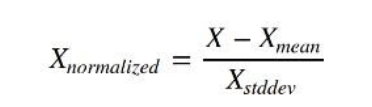

In [39]:
Image(filename='StandardScaler_formula.PNG')

Therefore, we have to reinvert the formula multiplying the normalized values by the standard deviation and then adding the mean of the variable.

In [40]:
#y_pred_1 desnormalization
y_pred_1_desnorm = (y_pred_1 * np.std(y_train)) + np.mean(y_train)

In [41]:
y_pred_1_desnorm

array([[214944.11],
       [182158.9 ],
       [228058.14],
       ...,
       [258972.53],
       [144682.84],
       [140134.44]], dtype=float32)

In [42]:
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1440    175000.0
1441    210000.0
1442    266500.0
1443    142125.0
1444    147500.0
Name: SalePrice, Length: 1445, dtype: float64

After comparing the predicted values the y_train we realized both are similar. 

Let's continue our analysis predicting the values using the test data.

#### 4.3.2 Predict the results of the test set 

In [43]:
#predict the results of the train set
y_pred_2 = ann.predict(X_test_scaled)
np.set_printoptions(precision=2)
print(y_pred_2)

[[-0.73]
 [-0.1 ]
 [ 0.18]
 ...
 [-0.02]
 [-0.69]
 [ 0.56]]


In [44]:
#y_pred_2 desnormalization
y_pred_2_desnorm = (y_pred_2 * np.std(y_train)) + np.mean(y_train)

In [45]:
y_pred_2_desnorm

array([[126285.66],
       [169830.58],
       [189616.31],
       ...,
       [175815.9 ],
       [128986.62],
       [215736.52]], dtype=float32)

Once we have predicted the test values, we proceed to save the results, as we will build later a file to submit our results in the Kaggle competition.

In [46]:
#converting the results into a dataframe
y_pred_2_desnorm_df = pd.DataFrame(y_pred_2_desnorm)

#export the results to csv
y_pred_2_desnorm_df.to_csv('y_pred_ann_test.csv', index=False) 

In [47]:
y_pred_2_desnorm_df.head()

,0
0,126285.656250
1,169830.578125
2,189616.312500
3,193415.718750
4,185624.375000


### 4.4 Check the performance of the model

Now, we are going to calculate some metrics to check the performance of our model, that is, review applying metrics if we have managed to build a model that provides good results or not. 

To do it, we will use the following metrics: R-squered, Mean-Squered-Error (MSE) and the Root-Mean-Squared-Error (RMSE).

In [48]:
import sklearn.metrics as metrics
#Compute R-squared for the y_train and y_pred_2 (training results)
print("R-squared (Training Results) =", metrics.r2_score(y_train_norm, y_pred_1))
#Compute Mean-Squared-Error (MSE) for the y_train and y_pred_1 (training results)
print("MSE (Training Results) =", metrics.mean_squared_error(y_train_norm, y_pred_1))

R-squared (Training Results) = 0.9146871942732417
MSE (Training Results) = 0.0853128057267582


In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Compute Root-Mean-Squared-Error (RMSE) for the y_train and y_pred_1 (training results)
print("RMSE (Training Results)=", sqrt(mean_squared_error(y_train_norm, y_pred_1)))

RMSE (Training Results)= 0.29208355949412523


Comparing the results obtained in the ANN with the Random Forest Regressor, although the R-Squared result was better by applying Random Forest ('0,9999 vs 0,9412', respectively), we achieved a good result in the MSE and RMSE applying the ANN ('0,0578 vs 19.508,86' and '139,68 vs 0,24244', respectively). 

Therefore, we think that ANN has a lot of potential and can help us build a robust model that correctly predicts house prices. 

### 4.5 Create a submission for the Kaggle competition

The last step in our analysis is to merge the "Id" column of the test set with the predicted results (y_pred_4) in order to make a submission in the Kaggle competition. One of the Kaggle's rules is to upload a file with 1459 prediction rows and a header row with the "Id" and "SalePrice" columns.

So, we are going to compile this information in one dataframe and create a submission in the Kaggle Leaderboard.

Let's do it!

In [50]:
#upload the original test data (we need to recover the 'Id' column)
df_test_original = pd.read_csv('test.csv')
df_test_original.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [51]:
#Creating the "Id_test" dataframe to merge the Id column of the test set with the y_pred_4 results later 
Id_test = df_test_original[['Id']]
Id_test.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [52]:
#Merging the "Id_test" set with the y_pred_4_df results 
ann_final_results = pd.concat([Id_test, y_pred_2_desnorm_df], axis=1,)
ann_final_results.head()

,Id,0
0,1461,126285.656250
1,1462,169830.578125
2,1463,189616.312500
3,1464,193415.718750
4,1465,185624.375000


In [53]:
#check the shape of the ann_training_final_results dataframe
ann_final_results.shape

(1459, 2)

In [54]:
#rename the columns of the  rf_final_results dataframe
ann_final_results.columns = ['Id', 'SalePrice']
ann_final_results.columns

Index(['Id', 'SalePrice'], dtype='object')

In [55]:
#export the rf_final_results and y_pred_4 to csv
ann_final_results.to_csv('ann_final_results.csv', index=False)  

End of the analysis.

Thanks for reading!